In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
FREQUENCY_VALUES = ['Once\nper month', 'Once every\ntwo weeks', 'Once\nper week', 
                    'Around three\ntimes per week', 'Daily', 'More than\nonce per day']

DURATION_VALUES = ['Several days', 'Around\n2 weeks', 'Around\na month', 
            'Around\n6 months', 'Around\na year']

In [3]:
len(FREQUENCY_VALUES)

6

In [4]:
len(DURATION_VALUES)

5

## Import dataframes

In [5]:
df_parent = pd.read_excel("Parent.xlsx")
df_parent.reset_index(inplace=True, drop=True)

df_parent.head()

,Language,Mother or Father,Child's age,Child's sex,Motivation of distant parenting,Duration of distant parenting,Frequency of communication,Content of communication,Importance rating on communication [0-7]
0,French,Mother,14,Male,programme Brigitte Sauzay Allemagne 3 mois,Around a month,Once per week,"Bien-être émotionnel, Santé physique, ses occu...",7
1,French,Mother,10,Male,camp de vacances,Around 2 weeks,Once every two weeks,Bien-être émotionnel,5
2,French,Father,14,Male,Problème familiaux,Around 6 months,Once per week,"Bien-être émotionnel, Santé physique",7
3,French,Mother,4,Female,Vacances de l’enfant sans moi,Several days,Once per week,Bien-être émotionnel,5
4,French,Mother,6,Male,Il était en colonie à Ravoire.,Around 2 weeks,Once per week,Bien-être émotionnel,7


In [6]:
df_children = pd.read_excel("Children.xlsx")
df_children.reset_index(inplace=True, drop=True)

df_children.head()

,Language,Child's age,Child's sex,Motivation of distant parenting,Time away from family,Frequency of communication,Content of communication,Importance rating on communication [0-7]
0,English,14.0,Female,Summer vacation in Hamburg,Around a month,Around three times per week,Emotional well-being,7.0
1,English,7.0,Female,They went on holiday without us,Several days,Daily,Emotional well-being,7.0
2,English,19.0,Male,Studies - Travels abroad,Around a year,More than once per day,Informational,5.0
3,English,21.0,Male,Exchange studies,Around 6 months,Around three times per week,Emotional well-being,7.0
4,English,14.0,Male,School trip,Several days,Once per month,Check in,2.0


## Box Plots

/Users/mfeo15/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/mfeo15/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/mfeo15/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/mfeo15/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2081: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/mfeo15/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2082: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


AttributeError: Unknown property facecolor

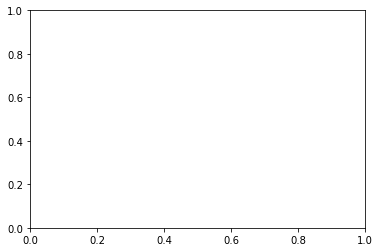

In [51]:
plt.boxplot(df_children["Child's age"], boxprops=dict(facecolor="purple"))
#plt.plot(1, df_children["Child's age"])
#plt.plot(2, Y_ave,'*', markersize=15)

plt.show()

#df_children.boxplot(column="Child's age")

## Plot n° 1

In [7]:
def compute_dataframe_for_plot_1():
    df = df_parent.groupby("Child's age").mean()
    df.columns = ["importance"]
    df.reset_index(inplace=True)
    
    return df

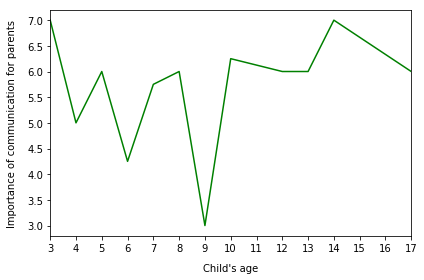

In [8]:
ax = compute_dataframe_for_plot_1().plot(x="Child's age", color='green')

#ax.set_title("Importance of communication\nfor parents according to child's age")
ax.set_ylabel("Importance of communication for parents", labelpad=10)
ax.set_xlabel("Child's age", labelpad=10)
ax.legend_.remove()

ages = [str(x) for x in range(0,18)]
plt.xticks(range(len(ages)), ages)
plt.xlim(3, 17)

plt.tight_layout()
plt.savefig("plot_1.png", dpi=300)

## Plot n° 2

In [9]:
def compute_dataframe_for_plot_2():
    df_s = df_children[df_children["Child's sex"] == "Male"].groupby("Child's age").mean()
    df_s.columns = ["importance"] 
    
    df_d = df_children[df_children["Child's sex"] == "Female"].groupby("Child's age").mean()
    df_d.columns = ["importance"]
    
    df_s.reset_index(inplace=True)
    df_d.reset_index(inplace=True)

    df_merged = pd.merge(df_s, df_d, 
                         on=["Child's age"], 
                         how='outer', 
                         suffixes=('_Sons', '_Daughters')
                        )
    
    df_merged_completed = df_merged.sort_values("Child's age")
    df_merged_completed.interpolate(inplace=True)
    
    return df_merged_completed

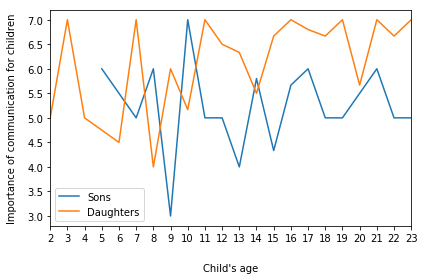

In [10]:
ax = compute_dataframe_for_plot_2().plot(x="Child's age")

#ax.set_title("Importance of communication for children according to their age")
ax.legend(['Sons', 'Daughters'])
ax.set_ylabel("Importance of communication for children", labelpad=10)
ax.set_xlabel("Child's age", labelpad=20)

ages = [str(x) for x in range(0,24)]
plt.xticks(range(len(ages)), ages)
plt.xlim(2, 23)

plt.tight_layout()
plt.savefig("plot_2.png", dpi=300)

## Plot n° 3

In [11]:
def filter_for_plot3(df_parent, df_children, sex):
    df_children_retrieve = df_children[df_children["Child's sex"] == sex]
    df_children_retrieve = df_children_retrieve[['Frequency of \ncommunication', 'Time away \nfrom family']]
    df_children_retrieve.columns = ['Frequency of communication', 'Duration']

    df_parent_retrieve = df_parent[df_parent["Child's sex"] == sex]
    df_parent_retrieve = df_parent_retrieve[['Frequency of \ncommunication', 'Duration of \ndistant parenting']]
    df_parent_retrieve.columns = ['Frequency of communication', 'Duration']

    df_output = df_children_retrieve.append(df_parent_retrieve)
    df_output.reset_index(inplace=True, drop=True)
    return df_output

In [12]:
def frequency_id(freq):
    if (freq == "More than once per day"):
        return 6
    
    if (freq == "Daily"):
        return 5
    
    if (freq == "Around three times per week"):
        return 4
    
    if (freq == "Once per week"):
        return 3
    
    if (freq == "Once every two weeks"):
        return 2
    
    if (freq == "Once per month"):
        return 1

In [13]:
def compute_dataframe_for_plot_3(df_sons, df_daughters):
    
    durations = ['Several days', 'Around 2 weeks', 'Around a month', 
                 'Around 6 months', 'Around a year']
    
    rows = []
    for x in durations:
        
        sons_freq = 0
        daughters_freq = 0
        
        sons_filtered = df_sons[df_sons['Duration'] == x]['Frequency of communication']
        daughters_filtered = df_daughters[df_daughters['Duration'] == x]['Frequency of communication']
        
        if (not sons_filtered.empty):
            sons_freq = frequency_id(sons_filtered.value_counts().idxmax())
            
        if (not daughters_filtered.empty):
            daughters_freq = frequency_id(daughters_filtered.value_counts().idxmax())
        
        rows.append( {"Duration":x, "Sons":sons_freq, "Daughters":daughters_freq } )
        
    df = pd.DataFrame(rows)
    return df

In [14]:
df_s = filter_for_plot3(df_parent, df_children, "Male")
df_d = filter_for_plot3(df_parent, df_children, "Female")

df_plot3 = compute_dataframe_for_plot_3(df_s, df_d)

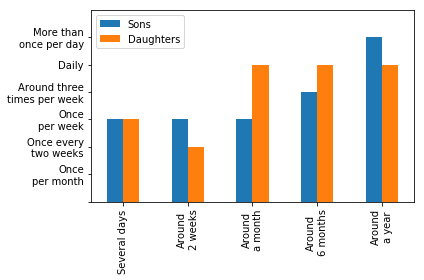

In [15]:
ax = df_plot3.plot(x="Duration", y=["Sons", "Daughters"], kind="bar")

ax.set_title("")
ax.legend(['Sons', 'Daughters'])
ax.set_yticks((0,1,2,3,4,5,6, 7))
ax.set_ylabel("")
ax.set_xlabel("")

plt.yticks(range(len([''] + FREQUENCY_VALUES)), [''] + FREQUENCY_VALUES)
plt.xticks(range(len(DURATION_VALUES)), DURATION_VALUES)

plt.tight_layout()
plt.savefig("plot_3.png", dpi=300)

## Plot 5

In [16]:
def compute_dataframe_for_plot_5():
    df = df_parent[["Duration of \ndistant parenting", "Importance rating \non communication [0-7]"]]
    df = df.groupby("Duration of \ndistant parenting").mean()
    df.columns = ['Importance']

    df = df.reindex([value.replace("\n", " ") for value in DURATION_VALUES])
    df.reset_index(inplace=True)
    
    return df

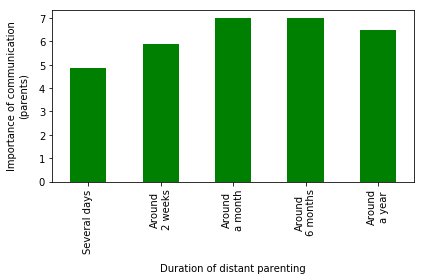

In [17]:
ax = compute_dataframe_for_plot_5().plot(x="Duration of \ndistant parenting", 
                                         y=["Importance"], 
                                         kind="bar", 
                                         color='green')

#ax.set_title("Importance of communication for parents\naccording to duration of distant-parenting")
ax.set_ylabel("Importance of communication\n(parents)", labelpad=10)
ax.set_xlabel("Duration of distant parenting", labelpad=10)
ax.legend_.remove()

plt.xticks(range(len(DURATION_VALUES)), DURATION_VALUES)
plt.yticks(range(8))

plt.tight_layout()
plt.savefig("plot_5.png", dpi=300)

## Plot 6

In [18]:
def compute_dataframe_for_plot_6():
    df_s = df_parent[df_parent["Child's sex"] == "Male"]
    df_s = df_s[["Duration of \ndistant parenting", "Importance rating \non communication [0-7]"]]
    df_s = df_s.groupby("Duration of \ndistant parenting").mean()
    df_s.columns = ['Importance']
    
    df_d = df_parent[df_parent["Child's sex"] == "Female"]
    df_d = df_d[["Duration of \ndistant parenting", "Importance rating \non communication [0-7]"]]
    df_d = df_d.groupby("Duration of \ndistant parenting").mean()
    df_d.columns = ['Importance']
    
    df_s = df_s.reindex([value.replace("\n", " ") for value in DURATION_VALUES])
    df_s.reset_index(inplace=True)
    
    df_d = df_d.reindex([value.replace("\n", " ") for value in DURATION_VALUES])
    df_d.reset_index(inplace=True)

    df_merged = pd.merge(df_s, df_d, 
                             on=["Duration of \ndistant parenting"], 
                             how='outer', 
                             suffixes=('_Sons', '_Daughters')
                            )


    return df_merged

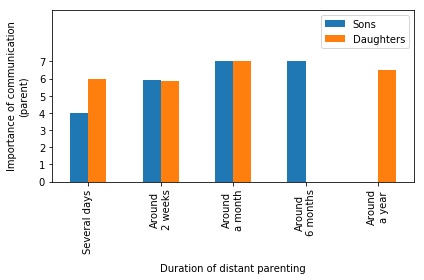

In [19]:
ax = compute_dataframe_for_plot_6().plot(x="Duration of \ndistant parenting", 
                                         y=["Importance_Sons", "Importance_Daughters"], 
                                         kind="bar")

#ax.set_title("Importance of communication for parents\naccording to duration of distant-parenting and away child's sex")
ax.legend(['Sons', 'Daughters'])
ax.set_ylim(0, 10)
ax.set_ylabel("Importance of communication\n(parent)", labelpad=10)
ax.set_xlabel("Duration of distant parenting", labelpad=10)

plt.xticks(range(len(DURATION_VALUES)), DURATION_VALUES)
plt.yticks(range(8))

plt.tight_layout()
plt.savefig("plot_6.png", dpi=300)

## Plot 7

In [20]:
def compute_dataframe_for_plot_7():
    df_s = df_children[df_children["Child's sex"] == "Male"]
    df_s = df_s[["Time away \nfrom family", "Importance rating \non communication [0-7]"]]
    df_s = df_s.groupby("Time away \nfrom family").mean()
    df_s.columns = ['Importance']
    
    df_d = df_children[df_children["Child's sex"] == "Female"]
    df_d = df_d[["Time away \nfrom family", "Importance rating \non communication [0-7]"]]
    df_d = df_d.groupby("Time away \nfrom family").mean()
    df_d.columns = ['Importance']
    
    df_s = df_s.reindex([value.replace("\n", " ") for value in DURATION_VALUES])
    df_s.reset_index(inplace=True)
    
    df_d = df_d.reindex([value.replace("\n", " ") for value in DURATION_VALUES])
    df_d.reset_index(inplace=True)

    df_merged = pd.merge(df_s, df_d, 
                             on=["Time away \nfrom family"], 
                             how='outer', 
                             suffixes=('_Sons', '_Daughters')
                            )


    return df_merged

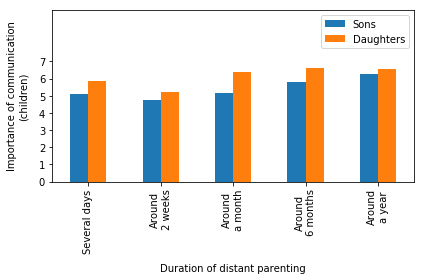

In [21]:
ax = compute_dataframe_for_plot_7().plot(x="Time away \nfrom family", 
                                         y=["Importance_Sons", "Importance_Daughters"], 
                                         kind="bar")

#ax.set_title("Importance of communication for childrens\naccording to duration of distant-parenting")
ax.legend(['Sons', 'Daughters'])
ax.set_ylim(0, 10)
ax.set_ylabel("Importance of communication\n(children)", labelpad=10)
ax.set_xlabel("Duration of distant parenting", labelpad=10)

plt.xticks(range(len(DURATION_VALUES)), DURATION_VALUES)
plt.yticks(range(8))

plt.tight_layout()
plt.savefig("plot_7.png", dpi=300)

## Plot 8

In [22]:
def compute_dataframe_for_plot_8():
    df = df_parent[["Frequency of \ncommunication", "Importance rating \non communication [0-7]"]]
    df = df.groupby("Frequency of \ncommunication").mean()
    df.columns = ['Importance']
    
    df = df.reindex([value.replace("\n", " ") for value in FREQUENCY_VALUES])
    df.reset_index(inplace=True)
    
    return df

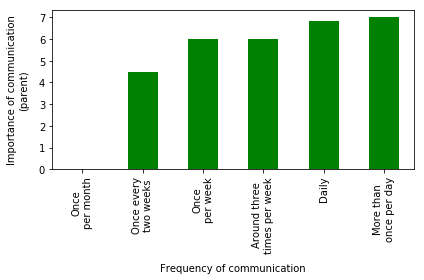

In [23]:
ax = compute_dataframe_for_plot_8().plot(x="Frequency of \ncommunication", 
                                          y=["Importance"], 
                                          kind="bar",
                                          color='green')

#ax.set_title("Importance of communication for parents\naccording to frequency of communication")
ax.legend(['Father', 'Mother'])
#ax.set_ylim(0, 9)
ax.set_ylabel("Importance of communication\n(parent)", labelpad=10)
ax.set_xlabel("Frequency of communication", labelpad=10)
ax.legend_.remove()

a = compute_dataframe_for_plot_8()
a_filter = a["Frequency of \ncommunication"]
plt.xticks(range(len(a_filter)), FREQUENCY_VALUES)
plt.yticks(range(8))

plt.tight_layout()
plt.savefig("plot_8.png", dpi=300)

## Plot 9

In [24]:
def compute_dataframe_for_plot_9():
    df_s = df_parent[df_parent["Child's sex"] == "Male"]
    df_s = df_s[["Frequency of \ncommunication", "Importance rating \non communication [0-7]"]]
    df_s = df_s.groupby("Frequency of \ncommunication").mean()
    df_s.columns = ['Importance']
    
    df_d = df_parent[df_parent["Child's sex"] == "Female"]
    df_d = df_d[["Frequency of \ncommunication", "Importance rating \non communication [0-7]"]]
    df_d = df_d.groupby("Frequency of \ncommunication").mean()
    df_d.columns = ['Importance']
    
    df_s = df_s.reindex([value.replace("\n", " ") for value in FREQUENCY_VALUES])
    df_s.reset_index(inplace=True)
    
    df_d = df_d.reindex([value.replace("\n", " ") for value in FREQUENCY_VALUES])
    df_d.reset_index(inplace=True)

    df_merged = pd.merge(df_s, df_d, 
                             on=["Frequency of \ncommunication"], 
                             how='outer', 
                             suffixes=('_Sons', '_Daughters')
                            )


    return df_merged

compute_dataframe_for_plot_9()

,Frequency of communication,Importance_Sons,Importance_Daughters
0,Once per month,0.000000,NaN
1,Once every two weeks,5.333333,2.0
2,Once per week,6.000000,6.0
3,Around three times per week,6.000000,6.0
4,Daily,7.000000,6.8
5,More than once per day,NaN,7.0


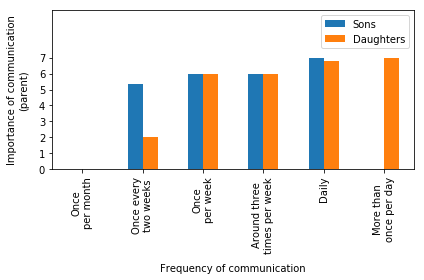

In [25]:
ax = compute_dataframe_for_plot_9().plot(x="Frequency of \ncommunication", 
                                           y=["Importance_Sons", "Importance_Daughters"], 
                                           kind="bar")

#ax.set_title("Importance of communication for parents\naccording to frequency of communication and away child's sex")
ax.legend(['Sons', 'Daughters'])
ax.set_ylim(0, 10)
ax.set_ylabel("Importance of communication\n(parent)", labelpad=10)
ax.set_xlabel("Frequency of communication", labelpad=10)

plt.xticks(range(len(FREQUENCY_VALUES)), FREQUENCY_VALUES)
plt.yticks(range(8))

plt.tight_layout()
plt.savefig("plot_9.png", dpi=300)

## Plot 10

In [26]:
def compute_dataframe_for_plot_10():
    df_s = df_children[df_children["Child's sex"] == "Male"]
    df_s = df_s[["Frequency of \ncommunication", "Importance rating \non communication [0-7]"]]
    df_s = df_s.groupby("Frequency of \ncommunication").mean()
    df_s.columns = ['Importance']
    
    df_d = df_children[df_children["Child's sex"] == "Female"]
    df_d = df_d[["Frequency of \ncommunication", "Importance rating \non communication [0-7]"]]
    df_d = df_d.groupby("Frequency of \ncommunication").mean()
    df_d.columns = ['Importance']
    
    df_s = df_s.reindex([value.replace("\n", " ") for value in FREQUENCY_VALUES])
    df_s.reset_index(inplace=True)
    
    df_d = df_d.reindex([value.replace("\n", " ") for value in FREQUENCY_VALUES])
    df_d.reset_index(inplace=True)

    df_merged = pd.merge(df_s, df_d, 
                             on=["Frequency of \ncommunication"], 
                             how='outer', 
                             suffixes=('_Sons', '_Daughters')
                            )


    return df_merged

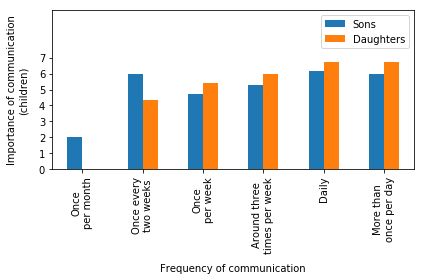

In [27]:
ax = compute_dataframe_for_plot_10().plot(x="Frequency of \ncommunication", 
                                           y=["Importance_Sons", "Importance_Daughters"], 
                                           kind="bar")

#ax.set_title("Importance of communication for childrens\naccording to frequency of communication")
ax.legend(['Sons', 'Daughters'])
ax.set_ylim(0, 10)
ax.set_ylabel("Importance of communication\n(children)", labelpad=10)
ax.set_xlabel("Frequency of communication", labelpad=10)

plt.xticks(range(len(FREQUENCY_VALUES)), FREQUENCY_VALUES)
plt.yticks(range(8))

plt.tight_layout()
plt.savefig("plot_10.png", dpi=300)

## Plot 11

In [28]:
def filter_for_plot11(df_parent, df_children, sex):
    df_children_retrieve = df_children[df_children["Child's sex"] == sex]
    df_children_retrieve = df_children_retrieve[['Frequency of \ncommunication', "Child's age"]]
    df_children_retrieve.columns = ['Frequency of communication', 'Age']

    df_parent_retrieve = df_parent[df_parent["Child's sex"] == sex]
    df_parent_retrieve = df_parent_retrieve[['Frequency of \ncommunication', "Child's age"]]
    df_parent_retrieve.columns = ['Frequency of communication', 'Age']

    df_output = df_children_retrieve.append(df_parent_retrieve)
    df_output.reset_index(inplace=True, drop=True)
    return df_output

In [29]:
def compute_dataframe_for_plot_11(df_sons, df_daughters, ages):
    
    rows = []
    for x in ages:
        
        sons_freq = 0
        daughters_freq = 0
        
        sons_filtered = df_sons[df_sons['Age'] == x]['Frequency of communication']
        daughters_filtered = df_daughters[df_daughters['Age'] == x]['Frequency of communication']
        
        if (not sons_filtered.empty):
            sons_freq = frequency_id(sons_filtered.value_counts().idxmax())
            
        if (not daughters_filtered.empty):
            daughters_freq = frequency_id(daughters_filtered.value_counts().idxmax())
        
        rows.append( {"Age":x, "Sons":sons_freq, "Daughters":daughters_freq } )
        
    df = pd.DataFrame(rows)
    df = df.replace(0, np.nan)
    df = df.interpolate()
    
    return df

In [30]:
df_s = filter_for_plot11(df_parent, df_children, "Male")
df_d = filter_for_plot11(df_parent, df_children, "Female")

min_age = df_s['Age'].min() if df_s['Age'].min() < df_d['Age'].min() else df_d['Age'].min()
max_age = df_s['Age'].max() if df_s['Age'].max() > df_d['Age'].max() else df_d['Age'].max()
ages = [x for x in range(int(min_age), int(max_age + 1))]

df_plot11 = compute_dataframe_for_plot_11(df_s, df_d, ages)

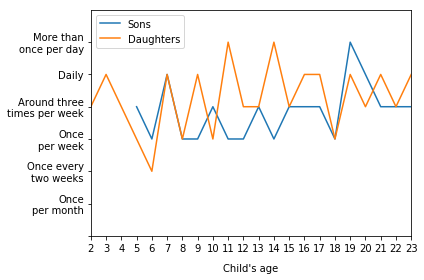

In [31]:
ax = df_plot11.plot(x="Age", y=["Sons", "Daughters"])

ax.set_title("")
ax.legend(['Sons', 'Daughters'])
ax.set_yticks((0,1,2,3,4,5,6, 7))
ax.set_ylabel("")
ax.set_xlabel("Child's age", labelpad=10)

plt.yticks(range(len([''] + FREQUENCY_VALUES)), [''] + FREQUENCY_VALUES)
ages = [str(x) for x in range(0, int(max_age + 1) )]
plt.xticks(range(len(ages)), ages)
plt.xlim(int(min_age), int(max_age))

plt.tight_layout()
plt.savefig("plot_11.png", dpi=300)

## Plot 12

In [32]:
def filter_for_plot12(df_parent):
    df_parent_retrieve = df_parent[['Frequency of \ncommunication', "Child's age"]]
    df_parent_retrieve.columns = ['Frequency of communication', 'Age']

    df_parent_retrieve.reset_index(inplace=True, drop=True)
    return df_parent_retrieve

In [33]:
def compute_dataframe_for_plot_12(df, ages):
    
    rows = []
    for x in ages:
        
        freq = 0 
        filtered = df[df['Age'] == x]['Frequency of communication']
        
        if (not filtered.empty):
            freq = frequency_id(filtered.value_counts().idxmax())
        
        rows.append( {"Age":x, "Freq":freq } )
        
    df = pd.DataFrame(rows)
    df = df.replace(0, np.nan)
    df = df.interpolate()
    
    return df

In [34]:
df = filter_for_plot12(df_parent)

ages = [x for x in range(int(df['Age'].min()), int(df['Age'].max() + 1))]

df_plot12 = compute_dataframe_for_plot_12(df, ages)

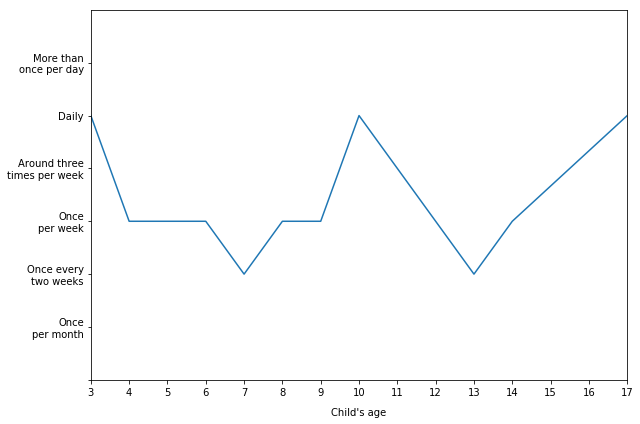

In [35]:
ax = df_plot12.plot(x="Age", y="Freq", figsize=(9, 6))

ax.set_title("")
ax.set_yticks((0,1,2,3,4,5,6, 7))
ax.set_ylabel("")
ax.set_xlabel("Child's age", labelpad=10)
ax.legend_.remove()

plt.yticks(range(len([''] + FREQUENCY_VALUES)), [''] + FREQUENCY_VALUES)
ages = [str(x) for x in range(0, int(df_plot12['Age'].max() + 1) )]
plt.xticks(range(len(ages)), ages)
plt.xlim(int(df_plot12['Age'].min()), int(df_plot12['Age'].max()))

plt.tight_layout()
plt.savefig("plot_12.png", dpi=300)

## Extra plot

In [36]:
def duration_id(dur):
    if (dur == "Several days"):
        return 1
    
    if (dur == "Around 2 weerks"):
        return 2
    
    if (dur == "Around a month"):
        return 3
    
    if (dur == "Around 6 months"):
        return 4
    
    if (dur == "Around a year"):
        return 5

In [37]:
def filter_for_plotEXTRA(df_parent, df_children, sex):
    df_children_retrieve = df_children[df_children["Child's sex"] == sex]
    df_children_retrieve = df_children_retrieve[['Time away \nfrom family', "Child's age"]]
    df_children_retrieve.columns = ['Duration of distant parenting', 'Age']

    df_parent_retrieve = df_parent[df_parent["Child's sex"] == sex]
    df_parent_retrieve = df_parent_retrieve[['Duration of \ndistant parenting', "Child's age"]]
    df_parent_retrieve.columns = ['Duration of distant parenting', 'Age']

    df_output = df_children_retrieve.append(df_parent_retrieve)
    df_output.reset_index(inplace=True, drop=True)
    return df_output

In [38]:
def compute_dataframe_for_plot_EXTRA(df_sons, df_daughters, ages):
    
    rows = []
    for x in ages:
        
        sons_dur = 0
        daughters_dur = 0
        
        sons_filtered = df_sons[df_sons['Age'] == x]['Duration of distant parenting']
        daughters_filtered = df_daughters[df_daughters['Age'] == x]['Duration of distant parenting']
        
        if (not sons_filtered.empty):
            sons_dur = duration_id(sons_filtered.value_counts().idxmax())
            
        if (not daughters_filtered.empty):
            daughters_dur = duration_id(daughters_filtered.value_counts().idxmax())
        
        rows.append( {"Age":x, "Sons":sons_dur, "Daughters":daughters_dur } )
        
    df = pd.DataFrame(rows)
    df = df.replace(0, np.nan)
    df = df.interpolate()
    
    return df

In [39]:
df_s = filter_for_plotEXTRA(df_parent, df_children, "Male")
df_d = filter_for_plotEXTRA(df_parent, df_children, "Female")

min_age = df_s['Age'].min() if df_s['Age'].min() < df_d['Age'].min() else df_d['Age'].min()
max_age = df_s['Age'].max() if df_s['Age'].max() > df_d['Age'].max() else df_d['Age'].max()
ages = [x for x in range(int(min_age), int(max_age + 1))]

df_plotEXTRA = compute_dataframe_for_plot_EXTRA(df_s, df_d, ages)

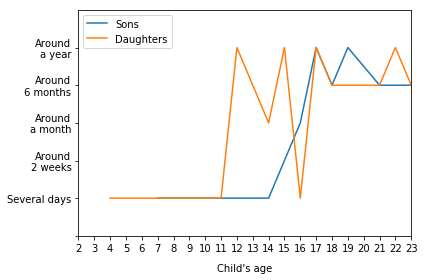

In [40]:
ax = df_plotEXTRA.plot(x="Age", y=["Sons", "Daughters"])

ax.set_title("")
ax.legend(['Sons', 'Daughters'])
ax.set_yticks((0,1,2,3,4,5,6))
ax.set_ylabel("")
ax.set_xlabel("Child's age", labelpad=10)

plt.yticks(range(len([''] + DURATION_VALUES)), [''] + DURATION_VALUES)
ages = [str(x) for x in range(0, int(max_age + 1) )]
plt.xticks(range(len(ages)), ages)
plt.xlim(int(min_age), int(max_age))

plt.tight_layout()
plt.savefig("plot_EXTRA.png", dpi=300)